In [131]:
import torch

#### [ 미니 테스트  2024-03-14 ]<hr>
[1] 지도학습에 대한 설명과 종류에 대해서 간략하게 설명해 주세요.

지도학습 : 비지도학습과 달리 정답을 훈련과정에 제공하면서 학습을 시키는 것

종류 : 회귀 - LinearRegression, KNeightborsRegression
      분류 - LogisiticRegression, KNeighborsClassifier


[2] 지도학습의 학습 프로세스를 간략하게 설명해 주세요.

- 데이터 전처리
- 학습
- 예측값의 오차 역전파
- 반복을 통해 최종 값 도출


[3] 선형회귀 대해 간략하게 설명해주세요.  
    - 개념  
    - 조건  
    - 동작원리  
    - 선형식  
    - 오차/잔차 계산 방법  

개념 : 각 데이터의 분포에 전체 분포와의 오차 합이 가장 작은 선을 찾아 데이터를 설명하는 것
조건 : 선형관계
동작원리 : 오차 합 최소화
선형식 : w1x1+w2x2+...+wnxn+b
오차/잔차 계산 방법 : MSE

 
[4] 로지스틱회귀 대해 간략하게 설명해주세요.  
   - 개념  
   - 조건  
   - 동작원리  
   - 선형식  
   - 오차/잔차 계산 방법  

개념 : 선형관계를 바탕으로 이진분류
조건 : 이진분류 관계
동작원리 : 시그모이드 함수
선형식 :
오차/잔차 계산 방법 : 크로스-엔트로피

 
[5] Fashion MNIST 데이터셋에서 10개 카테고리 중 하나를 선택해서 2진 분류로 구현해 주세요.  
- 데이터셋 : scikit-learn의 datasets 사용
    - from sklearn.datasets import fetch_openml 
    - db_name = 'Fashion-MNIST'
    - fashion_data = fetch_openml(name=db_name, parser='auto')
  


In [132]:
from sklearn.datasets import fetch_openml 
db_name = 'Fashion-MNIST'
fashion_data = fetch_openml(name=db_name, parser='auto')

In [133]:
fashion_data

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       1       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0      33   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [134]:
import pandas as pd
import numpy as np

# pd.DataFrame(fashion_data)

In [135]:
fashion_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [136]:
fashion_data.target

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [137]:
fashion_data.target

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [138]:
dataDF = fashion_data.data
dataDF

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# dataDF = dataDF.
feature = dataDF
target = fashion_data.target
feature.shape, target.shape

((70000, 784), (70000,))

In [140]:
# dataDF.corr()


In [141]:
# import seaborn as sns
# 
# sns.heatmap(dataDF.corr())

In [142]:
target.unique()
target

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [143]:
# target = target.replace({1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1,9:1})

In [144]:
target.unique()

['9', '0', '3', '2', '7', '5', '1', '6', '4', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [145]:
feature

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# from sklearn.preprocessing import LabelEncoder
# 
# encoder = LabelEncoder()
# encoder.fit(target)
# target = encoder.transform(target)
# target

In [147]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

X_train, x_test, y_train, y_test = train_test_split(feature,
                                                    target)
scaler = StandardScaler()
scaler.fit(X_train)
train = scaler.transform(X_train)
test = scaler.transform(x_test)

# model = LogisticRegression(solver='liblinear')
# # model.fit(train, y_train)
# 
# ovrmodel = OneVsRestClassifier(model)
# ovrmodel.fit(X_train, y_train)
# ovrmodel.predict(x_test)
# ovrmodel.decision_function(x_test)
# 
# print(f'[Train Score] {ovrmodel.score(X_train, y_train)}\n[Test Score] {ovrmodel.score(x_test, y_test)}')


In [148]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# 
# print(classification_report(y_test, model.predict(x_test), zero_division=0)) 

In [149]:
X_train = torch.from_numpy(np.array(X_train))
x_test = torch.from_numpy(np.array(x_test))
# X_train.shape, x_test.shape
y_train = torch.from_numpy(np.array(y_train))
y_test = torch.from_numpy(np.array(y_test))

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(784, 1),
    nn.LogSigmoid()
)

In [ ]:
# nb_epochs = 1000
# y_train1 = torch.from_numpy(np.array(y_train)).unsqueeze(1).float()  
# 
# for epoch in range(nb_epochs+1):
#     # hypothesis = model(train)
# 
#     hypothesis = torch.sigmoid(model(train))
#     # print(hypothesis)
#     # print(train.shape, y_train1.shape)
#     # print(y_train.unsqueeze(1).shape)
#     # print(y_train1)
# 
# 
#     cost = F.binary_cross_entropy(hypothesis, y_train1)
# 
#     optimizer.zero_grad()
#     cost.backward()
#     optimizer.step()
# 
#     if epoch % 10 == 0:
#         prediction = (hypothesis >= 0.5).float()
#         correct_prediction = prediction == y_train1
#         accuracy = correct_prediction.sum().item() / len(correct_prediction)
#         print(f'Epoch {epoch}/{nb_epochs}, Cost: {cost.item():.4f}, Accuracy: {accuracy*100:.2f}%')

# 답안

In [ ]:
# 모듈 로딩
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import torch
import torch.nn as nn                   # LinearRegression 기능의 클래스 Linear
import torch.nn.functional as F         # 손실함수
import torch.optim as optim             # 경사하강법 기반의 최적화 관련 모듈 

In [ ]:
### => 데이터 준비
fashion_db = 'fashion-mnist'
fashion_data = fetch_openml(name=fashion_db, parser='auto') # (, as frame=False)

In [ ]:
### => 데이터 확인
feature = fashion_data['data']
target = fashion_data['target']


In [ ]:
target


In [ ]:
# 피쳐와 타겟 갯수 확인
print(f'Feature => {feature.shape}, {feature.ndim}D')
print(f'Target => {target.shape}, {target.ndim}D')

In [ ]:
fashion_data.keys()

In [ ]:
print(f'Feature name => {fashion_data["feature_names"]}')
print(f'Target name => {fashion_data["target_names"]}')
print(f'Categories => {fashion_data["categories"]}')
print(f'Categories => {target.unique()}')



### [2] 데이터 가공 및 전처리 <hr>
- 결측치/중복/이상치 => 이 데이터에는 없음
- 다중분류 => 2진 분류 변환 : target 변환
- 표준화 => 이미지 동일 크기 및 색상 채널 : 동일 크기와 채널이라 변경 필요 없음
- 정규화 => 피쳐 정규화 / 타겟 정규화

#### [2-1] 다중분류 => 2진분류 변환 : target 변환

In [ ]:
# target.replace('0',1)
target = target =='0'
target.unique()

In [ ]:
target

#### [2-2] 정규화 ==> 피쳐 : 784개 색상값 즉, 0 ~ 255 범위 값

In [ ]:
norm_feature = feature/255.
norm_feature

#### [2-2] 정규화 ==> 타겟 : One-Hot 인코딩으로 변환

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohEncoder = OneHotEncoder()
ohEncoder.fit([target])
ohEncoder.categories_

In [ ]:
ohEncoder.transform([target]).toarray() # 리스트 안에 어레이

In [ ]:
ohEncoder = OneHotEncoder(sparse_output=False) # 리스트 안에 어레이
ohEncoder.fit([target])
ohEncoder.categories_
ohEncoder.transform([target])            

In [ ]:
from sklearn.preprocessing import OneHotEncoder

targetDF = target.to_frame()
ohEncoder = OneHotEncoder(sparse_output=False) # 2차원 DF를 입력
ohEncoder.fit(targetDF)
ohEncoder.categories_
norm_target = ohEncoder.transform(targetDF)
norm_target

In [ ]:
norm_target.shape

In [ ]:
norm_target.shape, norm_target.ndim


데이터 ==> 숫자변환
글자  ==> 정수변환 ==> 원핫인코딩 ==> 밀집행렬[임베딩]

### [3] 학습 준비 <hr>
- 학습 방법 : 지도학습 - 이진분류 => Linear 클래스 + sigmoid 함수
- 최적화 방법 : 경사하강법 기반의 방법 => Adam, SDG, ...
- 손실 함수 : 이진분류 손실 계산 함수 => binary_cross_entropy

In [150]:
norm_feature = pd.DataFrame(norm_feature)
norm_feature
norm_target = pd.DataFrame(norm_target)
norm_target

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
69995,1.0,0.0
69996,1.0,0.0
69997,1.0,0.0
69998,1.0,0.0


In [151]:
### == 데이터셋 준비 : 60,000개 훈련, 10,000개 테스트

limit = 60000
train = norm_feature.iloc[:limit]
test = norm_feature.iloc[limit:]

train_y = norm_target[:limit]
test_y = norm_target[limit:]

In [152]:
train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


In [153]:
# print(f'train {train.shape}, {train.ndim}D, {train_y.shape}, {train_y.ndim}D')
# print(f'test {test.shape}, {test.ndim}D, {test_y.shape}, {test_y.ndim}D')

In [154]:
### ==> 텐서로 변환
X_train = torch.FloatTensor(train.values)
x_test = torch.FloatTensor(test.values)
y_train = torch.FloatTensor(train_y.values)
y_test = torch.FloatTensor(test_y.values)

In [155]:
# print(f'X_train {X_train.shape}, {X_train.ndim}D, {y_train.shape}, {y_train.ndim}D')
# print(f'x_test  {x_test.shape}, {x_test.ndim}D,   {y_test.shape}, {y_test.ndim}D')

In [156]:
X_train.shape, norm_feature.shape

(torch.Size([60000, 784]), (70000, 784))

In [157]:
y_train.shape, norm_target.shape

(torch.Size([60000, 2]), (70000, 2))

In [158]:
### 학습 인스턴스 생성
in_, out_ = X_train.shape[1], y_train.shape[1]
model=nn.Linear(in_,out_)
model

Linear(in_features=784, out_features=2, bias=True)

In [159]:
### 최적화 인스턴스 생성 => 모델에서 사용하는 W, b 변수들 전달
optimizer = optim.Adam(model.parameters())

In [160]:
### 학습 횟수 =>
EPOCHS = 100

### [4] 학습 <hr>
- 반복횟수 만큼 학습 진행

In [169]:
loss_list = []
loss_accuracy = [[],[]]
for epoch in range(EPOCHS):
    # 학습
    pre_y = model(X_train)
    # print(f'예측값 : {pre_y}')
    # 분류값 변환
    pre_y2 = F.sigmoid(pre_y)
    # print(f'분류값 : {pre_y2}')

    # 오차 즉 손실 계산
    loss = F.binary_cross_entropy(pre_y2, y_train)
    loss_accuracy[0].append(loss.item())
    # print(f'[{epoch}] Loss = > {loss}')

    # W, b 업데이트
    optimizer.zero_grad()
    loss.backward()             # 손실함수 계산값으로 미분 진행하여 새로운 W, b 계산
    optimizer.step()                # 새로운 값으로 W, b 업데이트

    # 정확도 계산 => 예측값을 0과 1로 변환 ==> 정답과 비교
    train_accuracy = ((y_train.argmax(dim=1) == (pre_y2.argmax(dim=1)))).sum() / y_train.shape[0]
    # print(train_accuracy)
    loss_accuracy[1].append(train_accuracy.item())


In [168]:
# y_train.argmax(dim=1)

tensor([0, 1, 1,  ..., 0, 1, 0])

In [167]:
# pre_y2.argmax(dim=1)

tensor([0, 1, 0,  ..., 0, 1, 0])

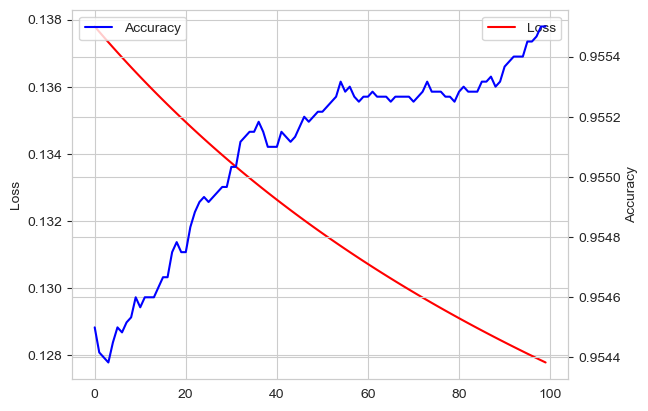

In [170]:
## 손실과 정확도 시각화
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.plot(loss_accuracy[0], label='Loss', color='red')
ax1.set_ylabel('Loss')
ax2 = ax1.twinx()
ax2.plot(loss_accuracy[1], label='Accuracy', color='blue')
ax2.set_ylabel('Accuracy')
ax1.legend()
ax2.legend()
plt.xlabel("Epochs")
plt.show()